In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data_customers = pd.read_csv(r'C:\Users\vinay\Ecommerce-transactions\Customers.csv')
data_products = pd.read_csv(r'C:\Users\vinay\Ecommerce-transactions\Products.csv')
data_transactions = pd.read_csv(r'C:\Users\vinay\Ecommerce-transactions\Transactions.csv')

In [4]:
data_customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
data_products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
data_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
print("Customers dataset object types:")
print(data_customers.info(), "\n")

Customers dataset object types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 



In [8]:
print("Products dataset object types:")
print(data_products.info(), "\n")

Products dataset object types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 



In [9]:
print("Transactions dataset object types:")
print(data_transactions.info(), "\n")

Transactions dataset object types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None 



In [10]:
print("Summary of Transactions dataset:")
print(data_transactions.describe(), "\n")

Summary of Transactions dataset:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000 



In [11]:
print("No of unique customers:", data_transactions['CustomerID'].nunique())
print("No of unique products:", data_transactions['ProductID'].nunique())
print("No of unique transactions:", data_transactions['TransactionID'].nunique())

No of unique customers: 199
No of unique products: 100
No of unique transactions: 1000


In [12]:
transactions_full = data_transactions.merge(data_customers, on='CustomerID', how='left').merge(data_products, on='ProductID', how='left')

print("Merged dataset:")
print(transactions_full.head(), "\n")

Merged dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving B

In [13]:
transactions_full['TransactionDate'] = pd.to_datetime(transactions_full['TransactionDate'])

transactions_full['TransactionMonth'] = transactions_full['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_full.groupby('TransactionMonth')['TotalValue'].sum().reset_index()
print(monthly_sales)

   TransactionMonth  TotalValue
0           2023-12     3769.52
1           2024-01    66376.39
2           2024-02    51459.27
3           2024-03    47828.73
4           2024-04    57519.06
5           2024-05    64527.74
6           2024-06    48771.18
7           2024-07    71366.39
8           2024-08    63436.74
9           2024-09    70603.75
10          2024-10    47063.22
11          2024-11    38224.37
12          2024-12    59049.20


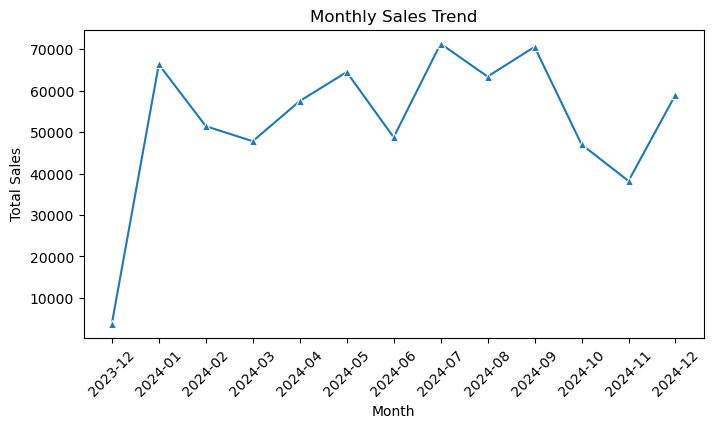

In [14]:
monthly_sales['TransactionMonth'] = monthly_sales['TransactionMonth'].astype(str)

plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_sales, x='TransactionMonth', y='TotalValue', marker='^')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


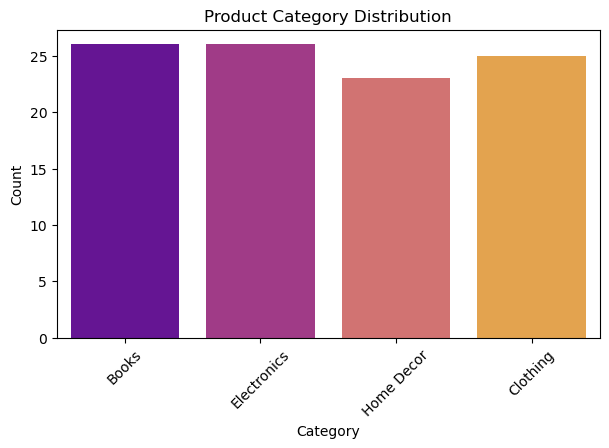

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(data=data_products, x='Category', palette='plasma')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

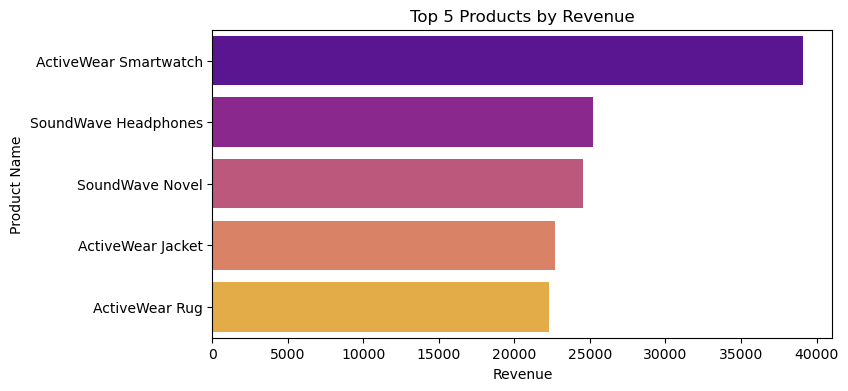

In [19]:
top_products = transactions_full.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=top_products.head(5), x='TotalValue', y='ProductName', palette='plasma')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.show()

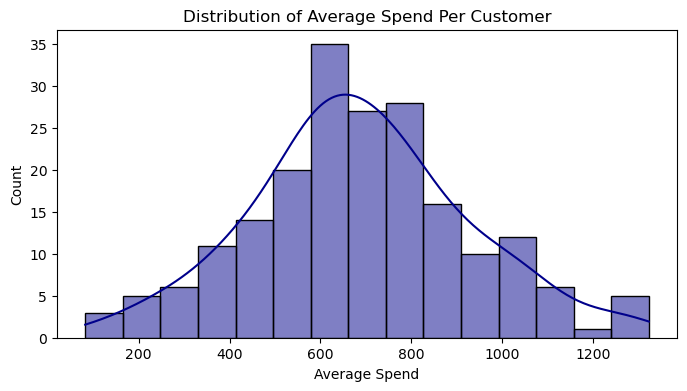

In [20]:
avg_spend = transactions_full.groupby('CustomerID')['TotalValue'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.histplot(avg_spend['TotalValue'], kde=True, bins=15, color='darkblue')
plt.title('Distribution of Average Spend Per Customer')
plt.xlabel('Average Spend')
plt.ylabel('Count')
plt.show()

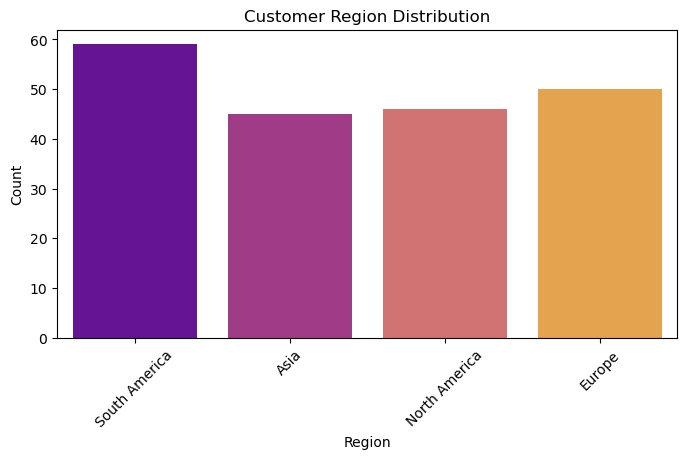

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_customers, x='Region', palette='plasma')
plt.title('Customer Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()